## Plots results as a function of detector resolution for 4 points

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special


import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl







/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
n_input_dirs = 4

n_pars = 2

par_names = [ 'mu', 'sig2' ]

input_dirs = np.array([
    'hist-pdf-study-1d-read-input-v1a-smearing-0.00',
    'hist-pdf-study-1d-read-input-v1a-smearing-0.25',
    'hist-pdf-study-1d-read-input-v1a-smearing-0.50',
    'hist-pdf-study-1d-read-input-v1a-smearing-0.75',
])

input_names = np.array([
    'Simple PDF, perfect det. res.',
    'Simple PDF, good det. res.',
    'Simple PDF, nominal det. res.',
    'Simple PDF, bad det. res.',
])

input_det_res = np.array([
    0.0,
    0.25,
    0.50,
    0.75,
])

input_lhr_type = np.array([
    'Simple PDF',
    'Simple PDF',
    'Simple PDF',
    'Simple PDF',
])


n_inference_types = 3

inference_names = np.array([
    'Unbinned ML fit',
    'chi2 fit, full cov.',
    'chi2 fit, diag. cov.',
])

n_samples = 500
n_ml_fits = 50






per_sample_val = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars, n_samples) ) 
per_sample_err = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars, n_samples) ) 

per_sample_ml_fit_val = np.zeros( shape=(n_input_dirs, n_pars, n_ml_fits) )
per_sample_ml_fit_err = np.zeros( shape=(n_input_dirs, n_pars, n_ml_fits) )

inference_color = np.array([
    'b','coral','g'
])


In [3]:



for di in range( n_input_dirs ) :
    
    print( ' %s ' % input_dirs[di])
    
    
    
    
    #-- ML fit and simple calc give same results for values, so use simple calc
    #     to avoid having to fit all 500.
    
    infile = '%s/simple-calc-per-sample-results.npy' % input_dirs[di]
    with open( infile, 'rb' ) as f :
        simple_calc_mean = np.load(f)
        simple_calc_cov  = np.load(f)
        
    per_sample_val[di,0,0,:] = simple_calc_mean
    per_sample_val[di,0,1,:] = simple_calc_cov
    
    
    
    
    infile = '%s/chi2-fit-results.npy' % input_dirs[di]
    
    with open( infile, 'rb' ) as f :
        chi2_fit_mu_val = np.load(f)
        chi2_fit_sig2_val = np.load(f)
        chi2_fit_mu_err = np.load(f)
        chi2_fit_sig2_err = np.load(f)
        chi2_fit_diag_mu_val = np.load(f)
        chi2_fit_diag_sig2_val = np.load(f)
        chi2_fit_diag_mu_err = np.load(f)
        chi2_fit_diag_sig2_err = np.load(f)        
    
    per_sample_val[di,1,0,:] = chi2_fit_mu_val
    per_sample_val[di,1,1,:] = chi2_fit_sig2_val
    
    per_sample_val[di,2,0,:] = chi2_fit_diag_mu_val
    per_sample_val[di,2,1,:] = chi2_fit_diag_sig2_val    
    
    per_sample_err[di,1,0,:] = chi2_fit_mu_err
    per_sample_err[di,1,1,:] = chi2_fit_sig2_err
    
    per_sample_err[di,2,0,:] = chi2_fit_diag_mu_err
    per_sample_err[di,2,1,:] = chi2_fit_diag_sig2_err    
    
    
    
    
    infile = '%s/fit-results.npy' % input_dirs[di]
    
    with open( infile, 'rb' ) as f :
        fit_results_mean_val = np.load(f)
        fit_results_mean_err = np.load(f)
        fit_results_cov_val = np.load(f)
        fit_results_cov_err = np.load(f)
        
        
        
        
    per_sample_ml_fit_val[di,0,:] = fit_results_mean_val
    per_sample_ml_fit_err[di,0,:] = fit_results_mean_err
    
    per_sample_ml_fit_val[di,1,:] = fit_results_cov_val
    per_sample_ml_fit_err[di,1,:] = fit_results_cov_err

    
    

 hist-pdf-study-1d-read-input-v1a-smearing-0.00 
 hist-pdf-study-1d-read-input-v1a-smearing-0.25 
 hist-pdf-study-1d-read-input-v1a-smearing-0.50 
 hist-pdf-study-1d-read-input-v1a-smearing-0.75 


## Inspect correlations between inference methods

<function matplotlib.pyplot.show(close=None, block=None)>

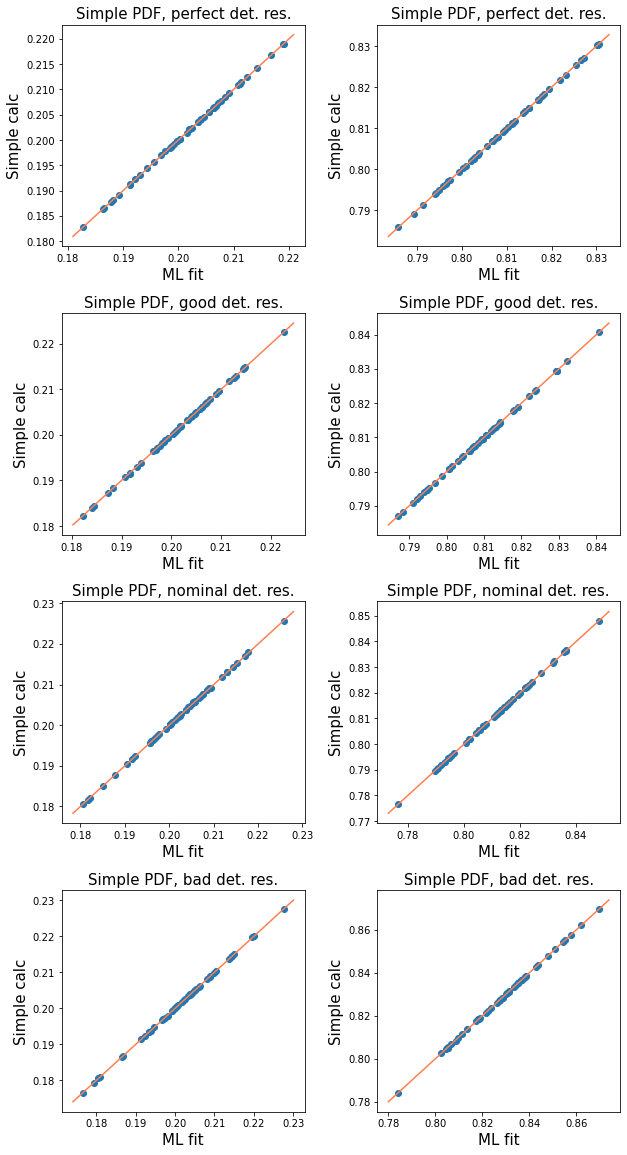

In [4]:
fig,ax = plt.subplots( 4, 2, figsize=(2*5,4*5))

plt.subplots_adjust( wspace=0.30, hspace=0.30)


for di in range( n_input_dirs ) :
    
    axi = ax[di,0]    
    pi=0
    ii=0
    axi.scatter( per_sample_ml_fit_val[di,pi,:], per_sample_val[di,ii,pi,:n_ml_fits])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('ML fit', fontsize=15)
    axi.set_ylabel('Simple calc', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
    
    
    axi = ax[di,1]
    pi=1
    ii=0
    axi.scatter( per_sample_ml_fit_val[di,pi,:], per_sample_val[di,ii,pi,:n_ml_fits])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('ML fit', fontsize=15)
    axi.set_ylabel('Simple calc', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

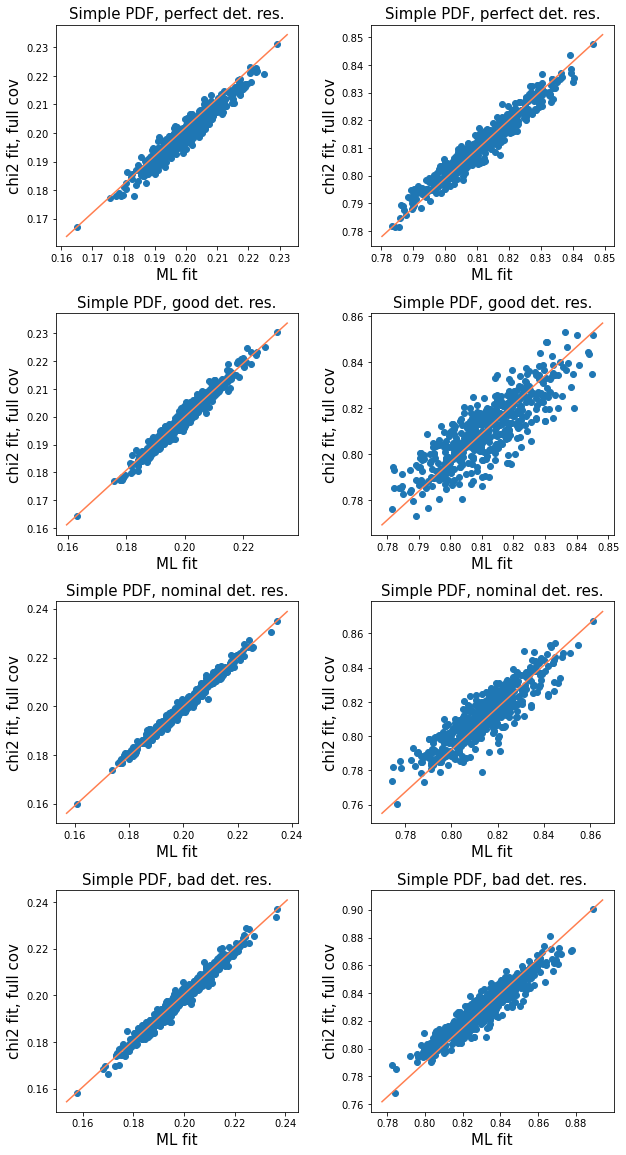

In [5]:
fig,ax = plt.subplots( 4, 2, figsize=(2*5,4*5))

plt.subplots_adjust( wspace=0.30, hspace=0.30)

iix=0
iiy=1

for di in range( n_input_dirs ) :
    
    axi = ax[di,0]    
    pi=0
    ii=0
    axi.scatter( per_sample_val[di,iix,pi,:], per_sample_val[di,iiy,pi,:])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('ML fit', fontsize=15)
    axi.set_ylabel('chi2 fit, full cov', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )

    
    
    
    axi = ax[di,1]
    pi=1
    ii=0
    axi.scatter( per_sample_val[di,iix,pi,:], per_sample_val[di,iiy,pi,:])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('ML fit', fontsize=15)
    axi.set_ylabel('chi2 fit, full cov', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

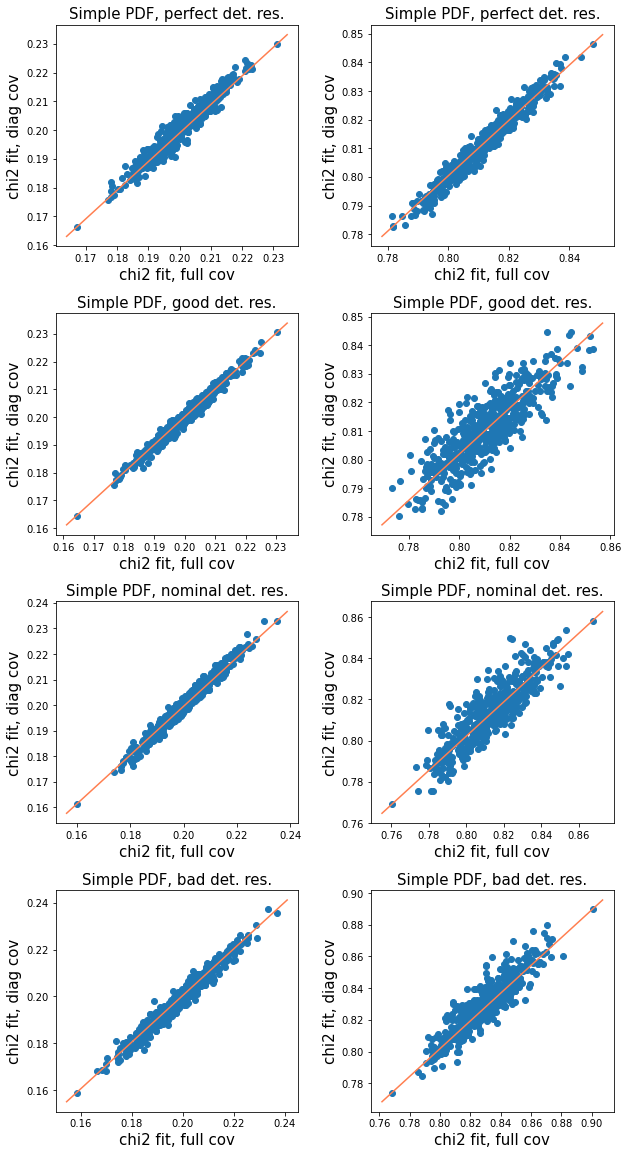

In [6]:
fig,ax = plt.subplots( 4, 2, figsize=(2*5,4*5))

plt.subplots_adjust( wspace=0.30, hspace=0.30)

iix=1
iiy=2

for di in range( n_input_dirs ) :
    
    axi = ax[di,0]    
    pi=0
    ii=0
    axi.scatter( per_sample_val[di,iix,pi,:], per_sample_val[di,iiy,pi,:])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('chi2 fit, full cov', fontsize=15)
    axi.set_ylabel('chi2 fit, diag cov', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
    
    
    axi = ax[di,1]
    pi=1
    ii=0
    axi.scatter( per_sample_val[di,iix,pi,:], per_sample_val[di,iiy,pi,:])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('chi2 fit, full cov', fontsize=15)
    axi.set_ylabel('chi2 fit, diag cov', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

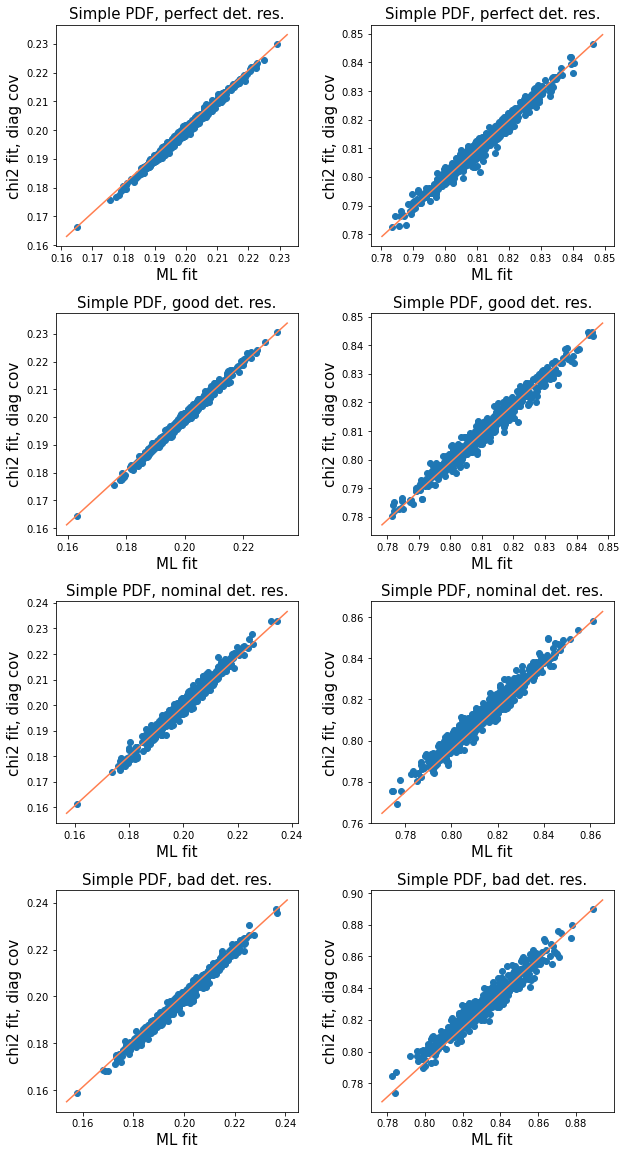

In [7]:
fig,ax = plt.subplots( 4, 2, figsize=(2*5,4*5))

plt.subplots_adjust( wspace=0.30, hspace=0.30)

iix=0
iiy=2

for di in range( n_input_dirs ) :
    
    axi = ax[di,0]    
    pi=0
    ii=0
    axi.scatter( per_sample_val[di,iix,pi,:], per_sample_val[di,iiy,pi,:])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('ML fit', fontsize=15)
    axi.set_ylabel('chi2 fit, diag cov', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
    
    
    axi = ax[di,1]
    pi=1
    ii=0
    axi.scatter( per_sample_val[di,iix,pi,:], per_sample_val[di,iiy,pi,:])
    axi.plot( axi.get_xlim(), axi.get_ylim(), color='coral' )
    
    axi.set_xlabel('ML fit', fontsize=15)
    axi.set_ylabel('chi2 fit, diag cov', fontsize=15)
    axi.set_title( input_names[di], fontsize=15 )
    
plt.show

## Calculate inference resolution and bias

In [18]:
results_inference_mean = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )
results_fit_err        = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )
results_rms            = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )


results_inference_mean_stat_err = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )
results_fit_err_stat_err        = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )
results_rms_stat_err            = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )


In [19]:
for di in range( n_input_dirs ) :
    
    for ii in range( n_inference_types ) :
        
        for pi in range( n_pars ) :
            
            results_inference_mean[di,ii,pi] = np.mean( per_sample_val[di,ii,pi,:] )
            
            if ii == 0 :
                results_fit_err[di,ii,pi] = np.mean( per_sample_ml_fit_err[di,pi,:] )
            else :
                results_fit_err[di,ii,pi] = np.mean( per_sample_err[di,ii,pi,:] )
            
            ave_v = np.mean( per_sample_val[di,ii,pi,:] )
            ave_v2 = np.mean( per_sample_val[di,ii,pi,:] * per_sample_val[di,ii,pi,:] )
            
            cov_vv = ave_v2 - ave_v*ave_v
            
            rms_v = np.sqrt( cov_vv )
            
            results_rms[di,ii,pi] = rms_v
            

## Plot results vs detector resolution

<function matplotlib.pyplot.show(close=None, block=None)>

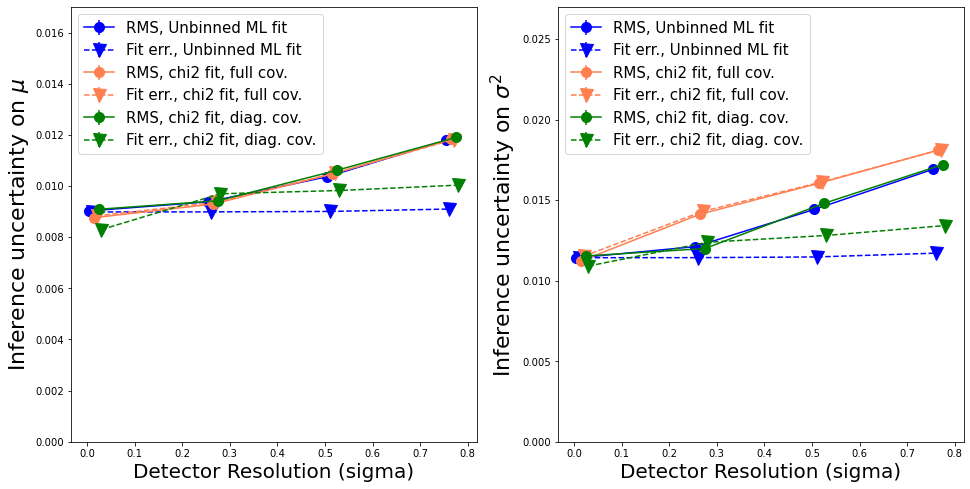

In [25]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))





pi = 0

amask = input_lhr_type == 'Simple PDF'

axi = ax[0]

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = 'RMS, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms[amask][:,it,pi], 
                 results_rms_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=10,
            label=plabel )
    
    xshift += 0.005
    plabel = 'Fit err., %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_fit_err[amask][:,it,pi],
             results_fit_err_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='--', marker='v', markersize=13,
            label=plabel )


    



pi = 1

axi = ax[1]

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = 'RMS, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms[amask][:,it,pi], 
                 results_rms_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=10,
            label=plabel )
    
    xshift += 0.005
    plabel = 'Fit err., %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_fit_err[amask][:,it,pi],
             results_fit_err_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='--', marker='v', markersize=13,
            label=plabel )


    

    
ax[0].set_ylim([0.0,0.017])
ax[1].set_ylim([0.0,0.027])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylabel('Inference uncertainty on $\mu$', fontsize=22)
ax[1].set_ylabel('Inference uncertainty on $\sigma^2$', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

#ax[0].set_title('Simple PDF', fontsize=25)
#ax[1].set_title('Neural Network', fontsize=25)


plt.show

In [26]:

print('\n\n')

for pi in range( results_inference_mean.shape[2]) :
    
    print(' ======= pi %d : %s' % (pi, par_names[pi]))
    
    for iti in range( results_inference_mean.shape[1] ) :
        
        print('   iti %d : %s' % (iti, inference_names[iti]))

        for di in range( results_inference_mean.shape[0] ) :
            
            print(' %2d, %2d, %3d : ' % (pi, iti, di), end='' )
            
            print(' %15s ,' % (input_lhr_type[di]), end='')
        
            print(' res = %.2f, ' % (input_det_res[di]), end='')
            
            print(' ave = %7.4f, ' % (results_inference_mean[di,iti,pi]), end='')
            
            print(' RMS = %7.4f, ' % (results_rms[di,iti,pi]), end='')
            
            print(' fit err. = %7.4f, ' % (results_fit_err[di,iti,pi]), end='')
            
            print()
        
        
        print()




 ======= pi 0 : mu
   iti 0 : Unbinned ML fit
  0,  0,   0 :       Simple PDF , res = 0.00,  ave =  0.2000,  RMS =  0.0090,  fit err. =  0.0090, 
  0,  0,   1 :       Simple PDF , res = 0.25,  ave =  0.2000,  RMS =  0.0094,  fit err. =  0.0090, 
  0,  0,   2 :       Simple PDF , res = 0.50,  ave =  0.2000,  RMS =  0.0104,  fit err. =  0.0090, 
  0,  0,   3 :       Simple PDF , res = 0.75,  ave =  0.1987,  RMS =  0.0118,  fit err. =  0.0091, 

   iti 1 : chi2 fit, full cov.
  0,  1,   0 :       Simple PDF , res = 0.00,  ave =  0.2001,  RMS =  0.0088,  fit err. =  0.0088, 
  0,  1,   1 :       Simple PDF , res = 0.25,  ave =  0.2000,  RMS =  0.0093,  fit err. =  0.0094, 
  0,  1,   2 :       Simple PDF , res = 0.50,  ave =  0.2001,  RMS =  0.0105,  fit err. =  0.0105, 
  0,  1,   3 :       Simple PDF , res = 0.75,  ave =  0.1988,  RMS =  0.0118,  fit err. =  0.0118, 

   iti 2 : chi2 fit, diag. cov.
  0,  2,   0 :       Simple PDF , res = 0.00,  ave =  0.2001,  RMS =  0.0091,  fit err